In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../dataset/crop_data.csv')
df.head()

,N,P,K,Ph,Temperature(C),Rainfall(cm),Humidity,Crop
0,25,20,34,7.2,33,169,74,coconut
1,28,63,20,6.8,21,56,65,lentil
2,31,8,33,7.4,29,177,77,coconut
3,12,38,26,6.0,35,121,80,mango
4,79,46,39,5.7,28,133,71,rice


In [4]:
df.columns

Index(['N', 'P', 'K', 'Ph', 'Temperature(C)', 'Rainfall(cm)', 'Humidity',
       'Crop'],
      dtype='object')

In [5]:
df['Crop'].unique()

array(['coconut', 'lentil', 'mango', 'rice', 'pigeonpeas', 'apple',
       'pomegranate', 'maize', 'orange', 'papaya', 'blackgram',
       'mungbean', 'mothbeans', 'banana', 'cotton', 'chickpea', 'grapes',
       'muskmelon', 'kidneybeans', 'watermelon'], dtype=object)

In [6]:
df.dtypes

N                   int64
P                   int64
K                   int64
Ph                float64
Temperature(C)      int64
Rainfall(cm)        int64
Humidity            int64
Crop               object
dtype: object

In [7]:
df['Crop'].value_counts()

coconut        1000
lentil         1000
kidneybeans    1000
muskmelon      1000
grapes         1000
chickpea       1000
cotton         1000
banana         1000
mothbeans      1000
mungbean       1000
blackgram      1000
papaya         1000
orange         1000
maize          1000
pomegranate    1000
apple          1000
pigeonpeas     1000
rice           1000
mango          1000
watermelon     1000
Name: Crop, dtype: int64

<AxesSubplot: >

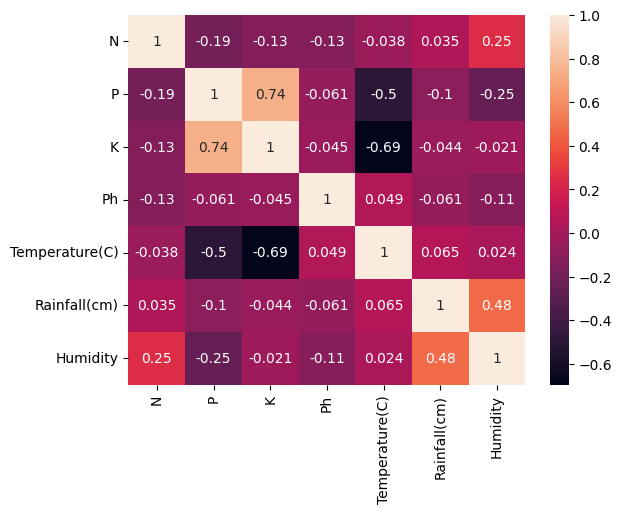

In [8]:
sns.heatmap(df.corr(),annot=True)

### Separating Features and Target labels

In [9]:
features = df[['N', 'P', 'K', 'Ph', 'Temperature(C)', 'Rainfall(cm)', 'Humidity']]
target = df['Crop']

labels = df['Crop']

In [10]:
# Intializing empty lists to append all models names and corresponding name
acc=[]
model=[]

In [11]:
# Splitting into traing and test data set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# DECISION TREE

In [12]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  72.625
              precision    recall  f1-score   support

       apple       0.91      1.00      0.95       211
      banana       1.00      0.98      0.99       190
   blackgram       1.00      0.45      0.62       191
    chickpea       1.00      1.00      1.00       198
     coconut       0.71      1.00      0.83       215
      cotton       1.00      1.00      1.00       206
      grapes       1.00      0.90      0.95       201
 kidneybeans       0.23      1.00      0.38       191
      lentil       0.00      0.00      0.00       209
       maize       1.00      1.00      1.00       189
       mango       1.00      0.54      0.70       194
   mothbeans       0.00      0.00      0.00       202
    mungbean       0.52      0.74      0.61       220
   muskmelon       0.49      0.73      0.59       187
      orange       1.00      1.00      1.00       212
      papaya       0.94      1.00      0.97       190
  pigeonpeas       0.00      0.00      0.00 

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target, cv=5)
score

array([0.7365 , 0.73075, 0.73225, 0.726  , 0.7325 ])

### Saving Trained Decision Tree model

In [15]:
import pickle
# Dump the trained Decision Tree classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.773
              precision    recall  f1-score   support

       apple       0.98      0.98      0.98       211
      banana       1.00      1.00      1.00       190
   blackgram       0.55      0.65      0.60       191
    chickpea       1.00      1.00      1.00       198
     coconut       0.77      0.81      0.79       215
      cotton       1.00      1.00      1.00       206
      grapes       0.98      0.98      0.98       201
 kidneybeans       0.37      0.53      0.43       191
      lentil       0.42      0.25      0.32       209
       maize       1.00      1.00      1.00       189
       mango       0.78      0.73      0.75       194
   mothbeans       0.60      0.40      0.48       202
    mungbean       0.57      0.66      0.61       220
   muskmelon       0.47      0.50      0.48       187
      orange       1.00      1.00      1.00       212
      papaya       0.99      1.00      0.99       190
  pigeonpeas       0.54      0.53      0.54    

In [17]:
# Cross validation score (Gaussian Naive Bayes)
score = cross_val_score(NaiveBayes, features, target, cv=5)
score

array([0.78   , 0.775  , 0.77225, 0.766  , 0.779  ])

### Saving trained Gaussian Naive Bayes

In [18]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NaiveBayes.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.773
              precision    recall  f1-score   support

       apple       0.98      0.99      0.98       211
      banana       1.00      1.00      1.00       190
   blackgram       0.59      0.66      0.62       191
    chickpea       1.00      1.00      1.00       198
     coconut       0.76      0.79      0.77       215
      cotton       1.00      1.00      1.00       206
      grapes       0.98      0.98      0.98       201
 kidneybeans       0.34      0.65      0.45       191
      lentil       0.39      0.16      0.22       209
       maize       1.00      1.00      1.00       189
       mango       0.76      0.72      0.74       194
   mothbeans       0.77      0.32      0.45       202
    mungbean       0.57      0.79      0.66       220
   muskmelon       0.46      0.51      0.48       187
      orange       1.00      1.00      1.00       212
      papaya       0.99      0.99      0.99       190
  pigeonpeas       0.63      0.50      0.55       206
 

In [20]:
# Cross validation score (SVM)
score = cross_val_score(SVM, features, target, cv=5)
score

array([0.754 , 0.743 , 0.7425, 0.7415, 0.749 ])

### Saving trained SVM Model

In [21]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVM.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.7195
              precision    recall  f1-score   support

       apple       0.97      0.95      0.96       211
      banana       1.00      1.00      1.00       190
   blackgram       0.45      0.63      0.53       191
    chickpea       0.99      1.00      1.00       198
     coconut       0.74      0.80      0.77       215
      cotton       0.91      0.90      0.91       206
      grapes       0.96      0.97      0.96       201
 kidneybeans       0.29      0.27      0.28       191
      lentil       0.35      0.31      0.33       209
       maize       0.87      0.88      0.88       189
       mango       0.72      0.68      0.70       194
   mothbeans       0.47      0.61      0.53       202
    mungbean       0.43      0.24      0.30       220
   muskmelon       0.48      0.55      0.51       187
      orange       0.99      0.98      0.98       212
      papaya       0.98      0.97      0.97       190
  pigeonpeas       0.32      0.32     

In [23]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.7325 , 0.73425, 0.729  , 0.7255 , 0.7285 ])

### Saving Trained LR model

In [24]:
import pickle
# Dump the trained Logistic Regression classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.78
              precision    recall  f1-score   support

       apple       0.98      0.98      0.98       211
      banana       1.00      1.00      1.00       190
   blackgram       0.65      0.68      0.66       191
    chickpea       1.00      1.00      1.00       198
     coconut       0.77      0.89      0.82       215
      cotton       1.00      1.00      1.00       206
      grapes       0.98      0.98      0.98       201
 kidneybeans       0.35      0.48      0.40       191
      lentil       0.39      0.42      0.40       209
       maize       1.00      1.00      1.00       189
       mango       0.85      0.70      0.77       194
   mothbeans       0.54      0.43      0.48       202
    mungbean       0.56      0.57      0.57       220
   muskmelon       0.49      0.60      0.54       187
      orange       1.00      1.00      1.00       212
      papaya       0.99      1.00      1.00       190
  pigeonpeas       0.67      0.49      0.57       206
 po

In [26]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.794  , 0.77925, 0.7795 , 0.7775 , 0.79025])

### Saving trained Random Forest model

In [27]:
import pickle
# Dump the trained Random Forest classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [29]:
pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19], got ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'cotton' 'grapes'
 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans' 'mungbean' 'muskmelon'
 'orange' 'papaya' 'pigeonpeas' 'pomegranate' 'rice' 'watermelon']

# Accuracy Comparision

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

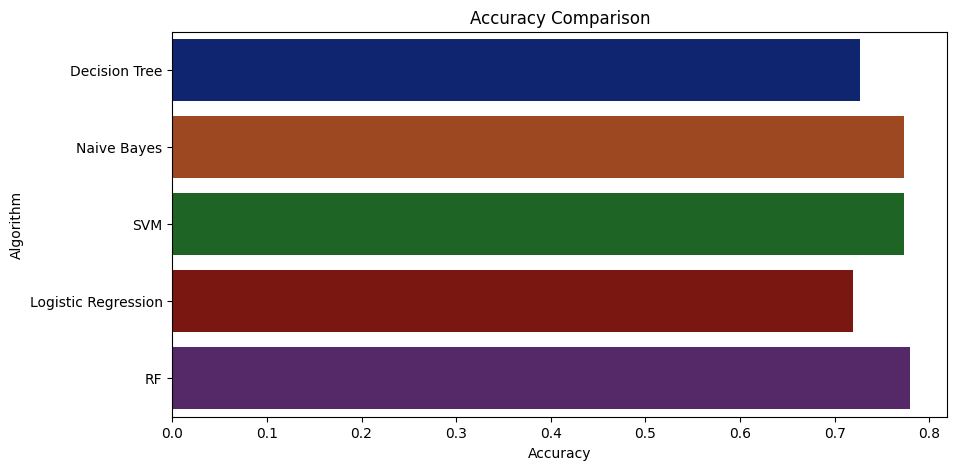

In [31]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [32]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.72625
Naive Bayes --> 0.773
SVM --> 0.773
Logistic Regression --> 0.7195
RF --> 0.78


### Making a Prediction

In [33]:
# Will be using RF
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['cotton']


In [34]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['rice']
